In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df = pd.read_csv("faults_memory.csv")
#df = pd.read_csv("~/Downloads/faults_memory.csv")
display(df)

,attempt,stop_addr,stop_fn,delay,target,bitflip,code
0,0,0x080195ec,Reset_Handler,0.0028,0x20005c3d,16,0
1,1,0x080195ea,Reset_Handler,0.0026,0x20005b02,32,0
2,2,0x080195e6,Reset_Handler,0.0052,0x200096eb,8,0
3,3,0x08000f22,HAL_RCC_OscConfig,0.0080,0x2000daef,8,0
4,4,0x080195e6,Reset_Handler,0.0036,0x200077bb,2,0
...,...,...,...,...,...,...,...
29896,7037,0x080031ec,vListInsert,1.4130,0x2000ae75,2,0
29897,0,0x0801a8a2,Reset_Handler,0.0030,0x2000a53a,16,0
29898,1,0x0801a8a4,Reset_Handler,0.0022,0x2000b344,32,0
29899,2,0x0801a8a4,Reset_Handler,0.0070,0x20004b84,16,0


In [13]:
cfgv_functions = pd.read_csv('../compiled_cfgv_functions.csv')
eddi_functions = pd.read_csv('../compiled_eddi_functions.csv')
cfgv_functions.equals(eddi_functions) # we are compiling the exact same functions with both mechanisms

True

In [14]:
compiled_functions = cfgv_functions

In [15]:
sz_tot = df.shape[0]
df_errcodes = df.groupby('code')
sz_df_errcodes = df_errcodes.size()

In [16]:
num_crash = sz_df_errcodes[-1]      # crash     = -1
num_silent = sz_df_errcodes[-2]     # sdc       = -2
num_freeze = sz_df_errcodes[-3]     # froze     = -3 (stuck into an infinite loop)
num_detect = sz_df_errcodes[1]      # detect    =  1

tot_faults = num_crash + num_silent + num_freeze + num_detect

In [21]:
tot_faults

217

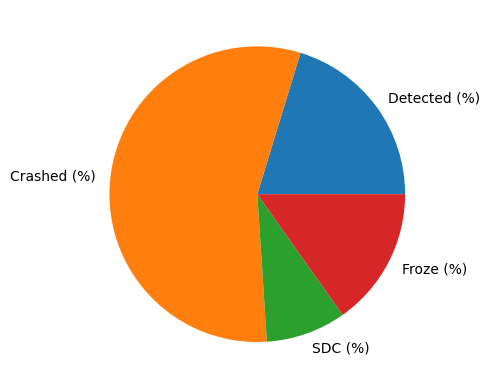

In [17]:
labels = 'Detected (%)','Crashed (%)','SDC (%)', 'Froze (%)'
plt.pie([num_detect/tot_faults, num_crash/tot_faults, num_silent/tot_faults, num_freeze/tot_faults], labels = labels)
plt.show()

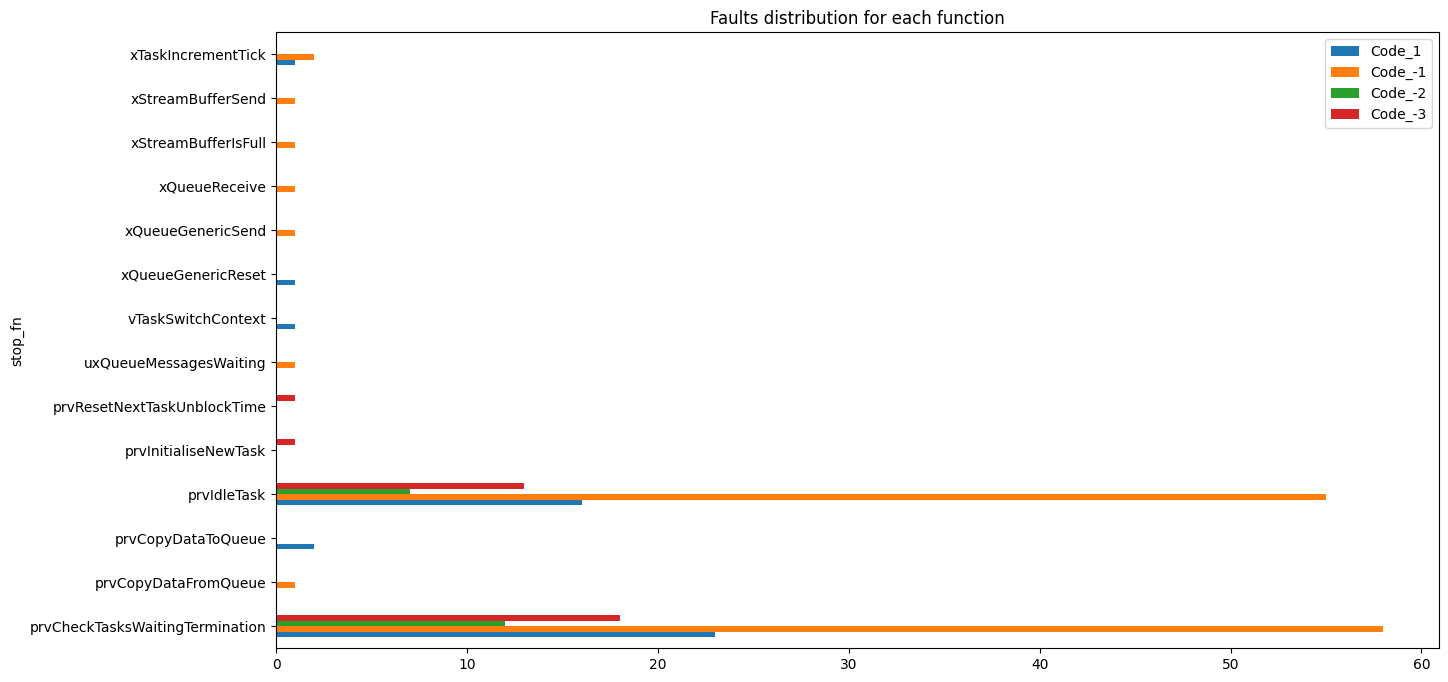

In [18]:
df_onehot = pd.get_dummies(df['code'], prefix="Code")
df1 = df.join(df_onehot)
df1 = df1.groupby(['stop_fn']).sum(numeric_only=True)
plot = df1[df1['code'] != 0].plot(y=['Code_1', 'Code_-1', 'Code_-2', 'Code_-3'],
                                  kind="barh",
                                  figsize=(15,8),
                                  title = 'Faults distribution for each function',)

In [19]:
df['fn_name'] = df['stop_fn']
df = pd.merge(df, compiled_functions, on='fn_name')
df

,attempt,stop_addr,stop_fn,delay,target,bitflip,code,fn_name
0,16,0x0800edf4,prvInitialiseTaskLists,0.0088,0x2000c1d1,8,0,prvInitialiseTaskLists
1,22,0x0800edfe,prvInitialiseTaskLists,0.0088,0x2000103e,128,0,prvInitialiseTaskLists
2,30,0x0800edc6,prvInitialiseTaskLists,0.0088,0x200084f6,1,0,prvInitialiseTaskLists
3,19,0x08010884,SystemClock_Config,0.0078,0x200053ff,8,0,SystemClock_Config
4,9,0x0801098e,SystemClock_Config,0.0078,0x2000dcd0,2,0,SystemClock_Config
...,...,...,...,...,...,...,...,...
29613,21561,0x08018766,vQueueDelete,4.3220,0x20003965,4,0,vQueueDelete
29614,4566,0x0801874e,vQueueDelete,0.9228,0x2000d9f6,2,0,vQueueDelete
29615,53,0x08005502,prvSampleTimeNow,0.0132,0x2000df1f,64,0,prvSampleTimeNow
29616,56,0x0800f678,prvDeleteTCB,0.0128,0x200047fc,128,0,prvDeleteTCB


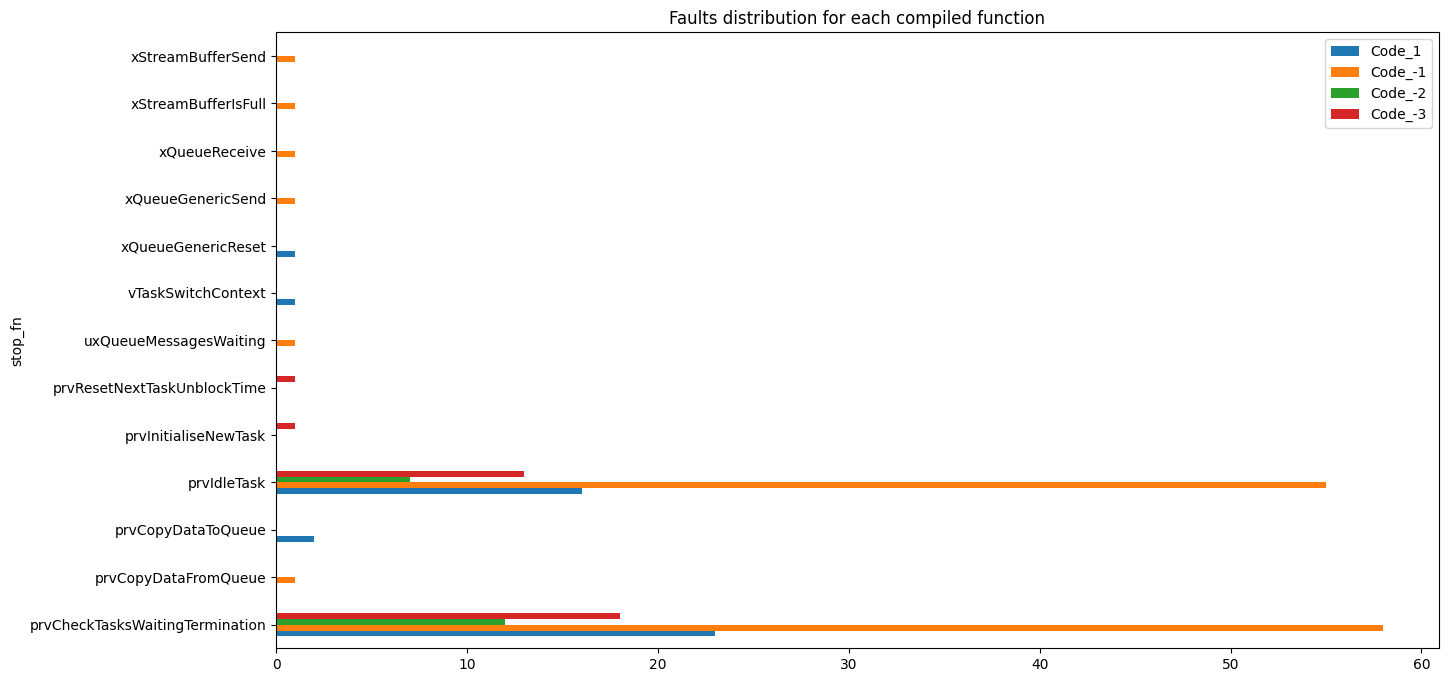

In [20]:
df_onehot = pd.get_dummies(df['code'], prefix="Code")
df1 = df.join(df_onehot)
df1 = df1.groupby(['stop_fn']).sum(numeric_only=True)
plot = df1[df1['code'] != 0].plot(y=['Code_1', 'Code_-1', 'Code_-2', 'Code_-3'],
                                  kind="barh",
                                  figsize=(15,8),
                                  title = 'Faults distribution for each compiled function',)